1 Data Exploration and Preprocessing:

Check for missing values and handle them if necessary.

Standardize or normalize the features if they are on different scales, as K-Means is sensitive to scale.

2 Feature Selection:

Based on the dataset's description, we may select numerical features suitable for clustering.

3 Apply K-Means Clustering:

Use the K-Means algorithm to cluster the data.

Determine an optimal number of clusters (e.g., using the Elbow Method).

4 Evaluate and Visualize Clusters:

Visualize clusters to interpret the results.


In [3]:
import pandas as pd

# Load the dataset
file_path = 'force2020_data_unsupervised_learning.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head, data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


(None,
        RHOB         GR  DEPTH_MD  NPHI        PEF         DTC
 0  1.884186  80.200851   494.528   NaN  20.915468  161.131180
 1  1.889794  79.262886   494.680   NaN  19.383013  160.603470
 2  1.896523  74.821999   494.832   NaN  22.591518  160.173615
 3  1.891913  72.878922   494.984   NaN  32.191910  160.149429
 4  1.880034  71.729141   495.136   NaN  38.495632  160.128342,
            RHOB         GR  DEPTH_MD      NPHI        PEF         DTC
 0      1.884186  80.200851   494.528       NaN  20.915468  161.131180
 1      1.889794  79.262886   494.680       NaN  19.383013  160.603470
 2      1.896523  74.821999   494.832       NaN  22.591518  160.173615
 3      1.891913  72.878922   494.984       NaN  32.191910  160.149429
 4      1.880034  71.729141   495.136       NaN  38.495632  160.128342
 ...         ...        ...       ...       ...        ...         ...
 18265  2.630211  19.418915  3271.416  0.187811        NaN         NaN
 18266  2.643114  21.444370  3271.568  0.18557

In [5]:
# Remove rows with missing data
data_dropped = data.dropna()

# Confirm the size of the dataset after dropping missing values
data_dropped_info = data_dropped.info()

data_dropped_info, data_dropped


<class 'pandas.core.frame.DataFrame'>
Index: 12202 entries, 4238 to 16439
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      12202 non-null  float64
 1   GR        12202 non-null  float64
 2   DEPTH_MD  12202 non-null  float64
 3   NPHI      12202 non-null  float64
 4   PEF       12202 non-null  float64
 5   DTC       12202 non-null  float64
dtypes: float64(6)
memory usage: 667.3 KB


(None,
            RHOB         GR  DEPTH_MD      NPHI       PEF         DTC
 4238   1.774626  55.892757  1138.704  0.765867  1.631495  147.837677
 4239   1.800986  60.929138  1138.856  0.800262  1.645080  142.382431
 4240   1.817696  62.117264  1139.008  0.765957  1.645873  138.258331
 4241   1.829333  61.010860  1139.160  0.702521  1.620216  139.198914
 4242   1.813854  58.501236  1139.312  0.639708  1.504854  144.290085
 ...         ...        ...       ...       ...       ...         ...
 16435  2.468236  90.537521  2993.256  0.341534  4.699200   86.474564
 16436  2.457519  88.819122  2993.408  0.351085  4.699200   86.187599
 16437  2.429228  92.128922  2993.560  0.364982  4.699200   87.797836
 16438  2.425479  95.870255  2993.712  0.367323  5.224292   88.108452
 16439  2.455546  96.814697  2993.864  0.379080  6.049967   88.956207
 
 [12202 rows x 6 columns])

In [6]:
data_dropped.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


In [14]:
# Extract feature columns for clustering
# Re-import StandardScaler and re-standardize the data to ensure all variables are defined
from sklearn.preprocessing import StandardScaler

# Re-initialize scaler and standardize the cleaned dataset
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_dropped)
data_standardized_df = pd.DataFrame(data_standardized, columns=data_dropped.columns)

# Extract feature columns and show the first few rows of the standardized data
features = data_standardized_df.columns.tolist()
features, data_standardized_df.head()


(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'],
        RHOB        GR  DEPTH_MD      NPHI       PEF       DTC
 0 -1.491843 -0.179292 -1.731605  2.523654 -1.255364  0.869531
 1 -1.387067 -0.010859 -1.731322  2.770744 -1.247886  0.690042
 2 -1.320646  0.028875 -1.731038  2.524300 -1.247450  0.554350
 3 -1.274390 -0.008126 -1.730754  2.068584 -1.261572  0.585297
 4 -1.335919 -0.092056 -1.730470  1.617342 -1.325067  0.752808)

In [15]:
# Display the descriptive statistics of the standardized data
data_standardized_df.describe()


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,1.220200e+04,1.220200e+04,12202.000000,1.220200e+04,1.220200e+04,1.220200e+04
mean,-5.217557e-16,7.453653e-17,0.000000,-1.490731e-16,2.236096e-16,-6.708287e-16
std,1.000041e+00,1.000041e+00,1.000041,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.609607e+00,-1.841459e+00,-1.731605,-2.705419e+00,-1.533222e+00,-2.161119e+00
25%,-6.605409e-01,-6.173961e-01,-0.866076,-7.239543e-01,-7.062589e-01,-1.034210e+00
50%,-3.601669e-01,5.459496e-02,-0.000547,3.758510e-01,-3.011687e-01,5.615503e-01
75%,9.535356e-01,5.509066e-01,0.866118,7.131280e-01,4.260700e-01,8.170400e-01
max,2.939426e+00,1.464037e+01,1.731647,2.770744e+00,7.218123e+00,1.398372e+00


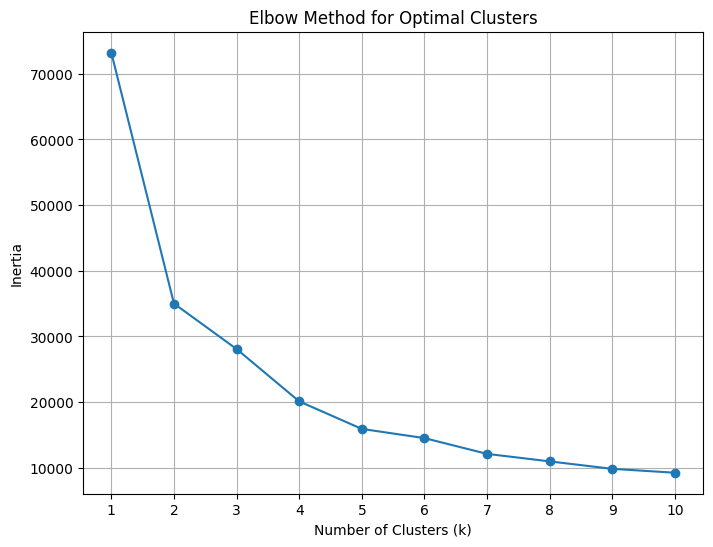

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(data_standardized_df, max_clusters=10):
    # Initialize a list to store inertia values for each cluster count
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data_standardized_df)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title("Elbow Method for Optimal Clusters")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.xticks(range(1, max_clusters + 1))
    plt.grid()
    plt.show()

    return inertia

# Run the function and plot the Elbow Method
inertia_values = find_optimal_clusters(data_standardized, max_clusters=10)


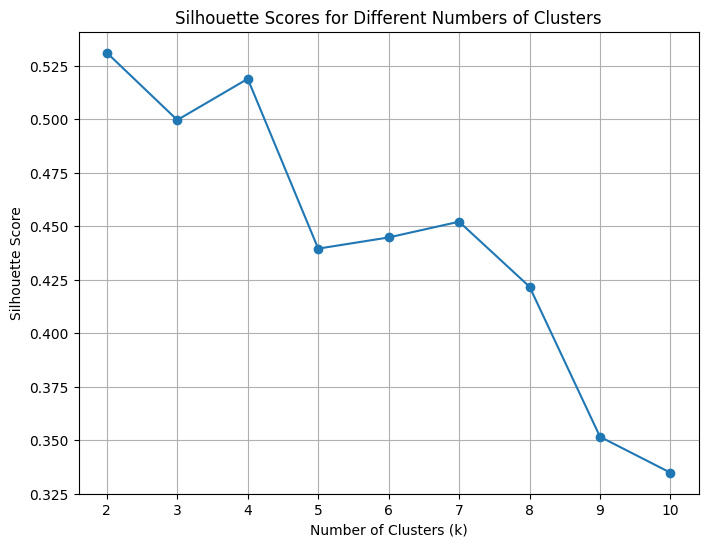

In [21]:
from sklearn.metrics import silhouette_score

def calculate_silhouette_scores(data, max_clusters=10):
    """
    Calculate silhouette scores for a range of cluster numbers.

    Parameters:
    - data: standardized dataset (numpy array or DataFrame)
    - max_clusters: maximum number of clusters to test

    Returns:
    - silhouette_scores: list of silhouette scores for each number of clusters
    """
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)  # Silhouette score needs at least 2 clusters

    for k in cluster_range:
        model = KMeans(n_clusters=k, random_state=0)
        labels = model.fit_predict(data_standardized_df)
        score = silhouette_score(data_standardized_df, labels)
        silhouette_scores.append(score)

    # Plot the silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title("Silhouette Scores for Different Numbers of Clusters")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

    return silhouette_scores

# Calculate and plot silhouette scores
silhouette_scores = calculate_silhouette_scores(data_standardized, max_clusters=10)


In [27]:
# Apply K-Means with 2 clusters
kmeans_2_clusters = KMeans(n_clusters=2, random_state=0)
data_dropped['Cluster'] = kmeans_2_clusters.fit_predict(data_standardized_df)

# Summarize statistics for each cluster
cluster_summary = data_dropped.groupby('Cluster').mean()
print("Cluster Summary for 2 Clusters:")
print(cluster_summary)


Cluster Summary for 2 Clusters:
             RHOB         GR     DEPTH_MD      NPHI       PEF         DTC
Cluster                                                                  
0        2.002353  65.559823  1777.108206  0.497882  3.476322  140.482956
1        2.465202  52.056492  2683.915413  0.236627  4.843569   80.670733


<ipython-input-27-7bf53efb85d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped['Cluster'] = kmeans_2_clusters.fit_predict(data_standardized_df)


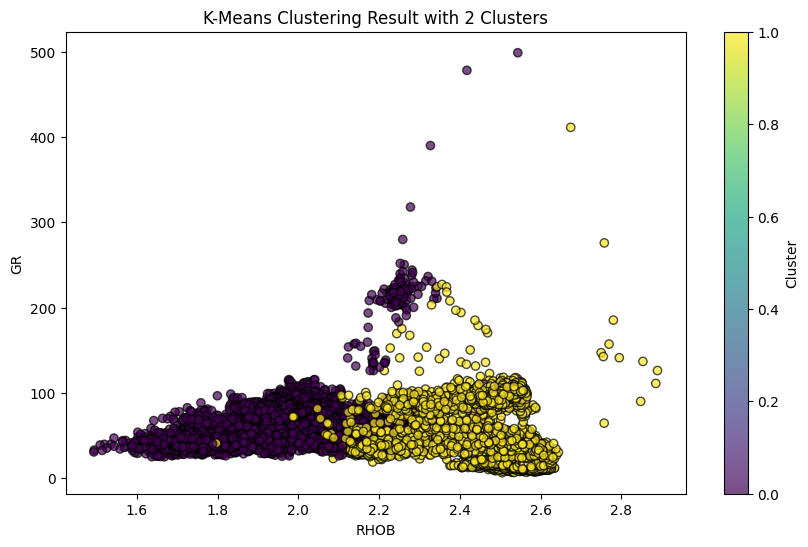

In [28]:
import matplotlib.pyplot as plt

# Choose two features for visualization (e.g., 'RHOB' and 'GR')
plt.figure(figsize=(10, 6))
plt.scatter(data_dropped['RHOB'], data_dropped['GR'], c=data_dropped['Cluster'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(label='Cluster')
plt.xlabel('RHOB')
plt.ylabel('GR')
plt.title('K-Means Clustering Result with 2 Clusters')
plt.show()


Cluster Summary for 4 Clusters:
             RHOB          GR     DEPTH_MD      NPHI       PEF         DTC
Cluster                                                                   
0        2.017946   66.611983  1722.330055  0.493547  2.898510  141.555935
1        2.482995   23.685661  2568.980162  0.178301  4.661657   73.851977
2        1.888116   41.886618  2105.658426  0.518062  7.450987  130.948144
3        2.441781  102.907848  2855.169488  0.326966  4.979830   92.565140


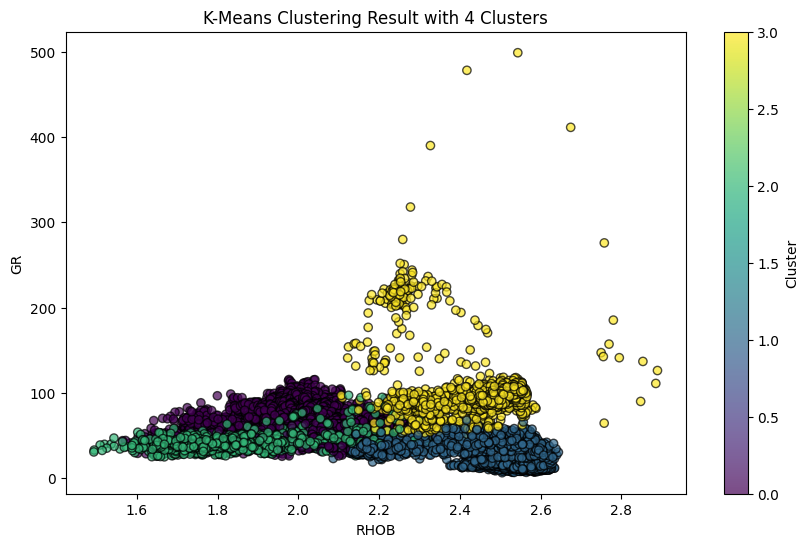

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and clean data by dropping missing values
data = pd.read_csv('force2020_data_unsupervised_learning.csv').dropna()  # Replace with your file path

# Standardize the cleaned data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Convert standardized data back to DataFrame to maintain compatibility
data_standardized_df = pd.DataFrame(data_standardized, columns=data.columns, index=data.index)

# Apply K-Means with 4 clusters
kmeans_4_clusters = KMeans(n_clusters=4, random_state=0)
data['Cluster'] = kmeans_4_clusters.fit_predict(data_standardized_df)

# Summarize statistics for each cluster
cluster_summary_4 = data.groupby('Cluster').mean()
print("Cluster Summary for 4 Clusters:")
print(cluster_summary_4)

# Plot the clustering result for two features (e.g., 'RHOB' and 'GR')
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['RHOB'], data['GR'], c=data['Cluster'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(label='Cluster')
plt.xlabel('RHOB')
plt.ylabel('GR')
plt.title('K-Means Clustering Result with 4 Clusters')
plt.show()
